In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
file = "data_files/revenue.xlsx"

In [3]:
revenue = pd.read_excel(file)
revenue

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2007,7069040,689072,4070949,2309019,7196459,3653466,2174210,546077,687816
1,ALASKA,2007,1800616,282270,1052357,465989,1938755,927307,645857,60699,257723
2,ARIZONA,2007,8724434,953861,4204089,3566484,8709531,3977800,2656438,403069,1436673
3,ARKANSAS,2007,4415981,483689,3319030,613262,4779308,2337748,1378576,450454,470562
4,CALIFORNIA,2007,72516936,7200298,42333637,22983001,73225422,34685013,20655194,3467540,10058842
...,...,...,...,...,...,...,...,...,...,...,...
510,VIRGINIA,2016,16259274,1058146,6297587,8903541,16497520,8944614,5164699,643506,1161323
511,WASHINGTON,2016,14964364,1097684,9211201,4655479,15253296,7087365,4904575,577606,2204059
512,WEST_VIRGINIA,2016,3391579,358068,1863062,1170449,3366566,1804235,1127255,236487,181392
513,WISCONSIN,2016,11697466,782610,5986763,4928093,11787535,5760418,3691439,508013,1082849


In [4]:
revenue.isnull().sum()

STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [5]:
grad_rate = pd.read_excel("data_files/grad_rate.xlsx")
grad_rate.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,States,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,United States,79.3,80.0,81.4,80.0,83.2,84.3,85.4
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0


In [7]:
grad_rate_df = grad_rate.rename(columns={"Unmaned: 0":"States", "Unnamed: 1":"2010", "Unnamed: 2":"2011", "Unnamed: 3":"2012", "Unnamed: 4":"2013", "Unnamed: 5":"2014", "Unnamed: 6":"2015", "Unnamed: 7":"2016" })
grad_rate_df.head()


,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016
0,States,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,United States,79.3,80.0,81.4,80.0,83.2,84.3,85.4
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0


In [8]:
grad_rate_df_1 = grad_rate_df.drop([0,1])
grad_rate_renamed = grad_rate_df_1.rename(columns={"Unnamed: 0": "State"})
grad_rate_renamed_df = grad_rate_renamed.set_index('State')
grad_rate_renamed_df.head()

,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,
Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0
Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
California,76.0,79.0,80.4,79.0,82.0,83.0,83.0


In [9]:
grad_rate_renamed_df.loc['Oklahoma'].transform(lambda x: x.fillna(x.mean()))


2010    83.075
2011    83.075
2012    84.800
2013    83.075
2014    82.500
2015    82.000
2016    83.000
Name: Oklahoma, dtype: float64

In [10]:
grad_rate_renamed_df.loc['Idaho'].transform(lambda x: x.fillna(x.mean()))

2010    79.633333
2011    79.633333
2012    79.633333
2013    79.633333
2014    78.900000
2015    80.000000
2016    80.000000
Name: Idaho, dtype: float64

In [11]:
grad_rate_renamed_df.loc['Kentucky'].transform(lambda x: x.fillna(x.mean()))


2010    88.275
2011    88.275
2012    86.100
2013    88.275
2014    88.000
2015    89.000
2016    90.000
Name: Kentucky, dtype: float64

In [12]:
us_grad_rate = pd.DataFrame(grad_rate_renamed.mean())
us_grad_rate_df = us_grad_rate.rename(columns={0:'Grad_Rate'})
us_grad_rate_df

,Grad_Rate
2010,78.375000
2011,79.750000
2012,81.090000
2013,79.750000
2014,82.990196
2015,82.431373
2016,84.588235


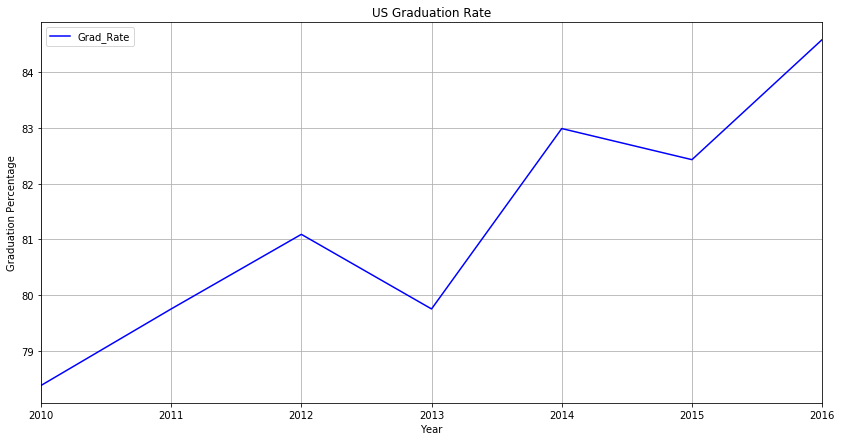

In [13]:
us_grad_rate_df.plot(kind='line', label='Grad_Rate', figsize=(14,7), color='b')
plt.xlabel('Year')
plt.ylabel('Graduation Percentage')
plt.title('US Graduation Rate')
plt.grid()
plt.legend(loc='best')

In [14]:
teacher_salaries = pd.read_excel("data_files/teacher_salaries_1.xlsx").round(0)
teacher_salaries_new = teacher_salaries.drop([0])
teacher_salaries_new.head()

,State,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568
2,Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682
3,Arizona,44700.0,45772.0,46358.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218,47255,48723
4,Arkansas,45590.0,45238.0,45738.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218,48304,50544
5,California,63640.0,65808.0,66995.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179,79128,80680


In [15]:
teacher_salaries_new_1 = teacher_salaries_new.drop(columns=['2007','2008','2009', '2017', '2018'], axis=1)
teacher_salaries_new_1.head()

,State,2010,2011,2012,2013,2014,2015,2016
1,Alabama,47571.0,47803.0,48003.0,47949.0,48720,48611,48518
2,Alaska,60732.0,62918.0,62425.0,65468.0,65891,66755,67443
3,Arizona,46952.0,46637.0,45193.0,45264.0,45335,47456,47218
4,Arkansas,46045.0,45998.0,46314.0,46631.0,47319,47823,48218
5,California,67932.0,67871.0,69755.0,69435.0,71396,74090,77179


In [16]:
grad_salary_df = pd.merge(grad_rate_renamed, teacher_salaries_new_1, on='State', how='outer')
grad_salary_df.head()

,State,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518
1,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443
2,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218
3,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218
4,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179


In [17]:
grad_salary_renamed = grad_salary_df.rename(columns={'2010_x' : '2010_grad_rate', '2011_x' : '2011_grad_rate',
                                                 '2012_x' : '2012_grad_rate', '2013_x' : '2013_grad_rate',
                                                 '2014_x' : '2014_grad_rate', '2015_x' : '2015_grad_rate',
                                                 '2016_x' : '2016_grad_rate', '2010_y':'2010_salary','2011_y':'2011_salary',
                                                 '2012_y':'2012_salary', '2013_y':'2013_salary', '2014_y':'2014_salary',
                                                 '2015_y':'2015_salary', '2016_y':'2016_salary'}) 

grad_salary_renamed.head()



,State,2010_grad_rate,2011_grad_rate,2012_grad_rate,2013_grad_rate,2014_grad_rate,2015_grad_rate,2016_grad_rate,2010_salary,2011_salary,2012_salary,2013_salary,2014_salary,2015_salary,2016_salary
0,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518
1,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443
2,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218
3,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218
4,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179


In [18]:
grad_salary_renamed.iloc[2,6]= 80


In [19]:
grad_salary_df = grad_salary_renamed[['State', '2010_grad_rate', '2010_salary', '2011_grad_rate', '2011_salary', 
                                     '2012_grad_rate', '2012_salary', '2013_grad_rate', '2013_salary',
                                     '2014_grad_rate', '2014_salary', '2015_grad_rate', '2015_salary',
                                     '2016_grad_rate', '2016_salary']]

grad_salary_df.head()



,State,2010_grad_rate,2010_salary,2011_grad_rate,2011_salary,2012_grad_rate,2012_salary,2013_grad_rate,2013_salary,2014_grad_rate,2014_salary,2015_grad_rate,2015_salary,2016_grad_rate,2016_salary
0,Alabama,72.0,47571.0,75.0,47803.0,80.0,48003.0,75.0,47949.0,89.3,48720,87.0,48611,89.0,48518
1,Alaska,68.0,60732.0,70.0,62918.0,71.8,62425.0,70.0,65468.0,75.6,65891,76.0,66755,78.0,67443
2,Arizona,78.0,46952.0,76.0,46637.0,75.1,45193.0,76.0,45264.0,77.4,45335,80.0,47456,78.0,47218
3,Arkansas,81.0,46045.0,84.0,45998.0,84.9,46314.0,84.0,46631.0,84.9,47319,87.0,47823,88.0,48218
4,California,76.0,67932.0,79.0,67871.0,80.4,69755.0,79.0,69435.0,82.0,71396,83.0,74090,83.0,77179


In [20]:
grad_salary_df.head()

,State,2010_grad_rate,2010_salary,2011_grad_rate,2011_salary,2012_grad_rate,2012_salary,2013_grad_rate,2013_salary,2014_grad_rate,2014_salary,2015_grad_rate,2015_salary,2016_grad_rate,2016_salary
0,Alabama,72.0,47571.0,75.0,47803.0,80.0,48003.0,75.0,47949.0,89.3,48720,87.0,48611,89.0,48518
1,Alaska,68.0,60732.0,70.0,62918.0,71.8,62425.0,70.0,65468.0,75.6,65891,76.0,66755,78.0,67443
2,Arizona,78.0,46952.0,76.0,46637.0,75.1,45193.0,76.0,45264.0,77.4,45335,80.0,47456,78.0,47218
3,Arkansas,81.0,46045.0,84.0,45998.0,84.9,46314.0,84.0,46631.0,84.9,47319,87.0,47823,88.0,48218
4,California,76.0,67932.0,79.0,67871.0,80.4,69755.0,79.0,69435.0,82.0,71396,83.0,74090,83.0,77179


In [21]:
pupil_spending = pd.read_excel("data_files/per_pupil_spending.xlsx")
pupil_spending.head()

,STATE,2007,Unnamed: 2,2008,Unnamed: 4,2009,Unnamed: 6,2010,Unnamed: 8,2011,...,2012,Unnamed: 12,2013,Unnamed: 14,2014,Unnamed: 16,2015,Unnamed: 18,2016,Unnamed: 20
0,NaN,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,...,PPCS,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1
1,United States,9666.38,5.8,10258.9,6.1,10498.7,2.3,10600.1,1,10608.3,...,10607.7,(Z),10723.5,1.09213,11002.6,2.60285,11391.8,3.53702,11763.2,3.2604
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491


In [22]:
pupil_spending_renamed = pupil_spending.rename(columns={"2007":"2007_PPS", "2008":"2008_PPS", "2009":"2009_PPS",
                                                       "2010":"2010_PPS", "2011":"2011_PPS", "2012":"2012_PPS", "2013":"2013_PPS",
                                                       "2014":"2014_PPS", "2015":"2015_PPS", "2016":"2016_PPS", 
                                                       "Unnamed: 2":"2007 pct_change", "Unnamed: 4":"2008 pct_change",
                                                       "Unnamed: 6":"2009 pct_change","Unnamed: 8":"2010 pct_change",
                                                       "Unnamed: 10":"2011 pct_change", "Unnamed: 12":"2012 pct_change",
                                                       "Unnamed: 14":"2013 pct_change", "Unnamed: 16":"2014 pct_change",
                                                       "Unnamed: 18":"2015 pct_change", "Unnamed: 20":"2016 pct_change"})

pupil_spending_renamed.head()


,STATE,2007,2007 pct_change,2008,2008 pct_change,2009,2009 pct_change,2010,2010 pct_change,2011,...,2012,2012 pct_change,2013,2013 pct_change,2014,2014 pct_change,2015,2015 pct_change,2016,2016 pct_change
0,NaN,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,...,PPCS,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1
1,United States,9666.38,5.8,10258.9,6.1,10498.7,2.3,10600.1,1,10608.3,...,10607.7,(Z),10723.5,1.09213,11002.6,2.60285,11391.8,3.53702,11763.2,3.2604
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491


In [23]:
pupil_spending_df = pupil_spending_renamed.drop([0,1])
pupil_spending_df.head()

,STATE,2007,2007 pct_change,2008,2008 pct_change,2009,2009 pct_change,2010,2010 pct_change,2011,...,2012,2012 pct_change,2013,2013 pct_change,2014,2014 pct_change,2015,2015 pct_change,2016,2016 pct_change
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491
5,ARKANSAS,8283.57,4.5,8541.25,3.1,8711.92,2.0,9143.21,5.0,9353.38,...,9410.62,0.611975,9394.45,-0.171851,9615.73,2.35541,9693.8,0.811872,9845.57,1.56565
6,CALIFORNIA,9152.39,7.9,9863.39,7.8,9657.49,-2.1,9374.71,-2.9,9148.75,...,9182.89,0.373249,9219.51,0.398729,9594.76,4.0702,10466.5,9.08591,11495.4,9.82971


In [24]:
pupil_spending_df.isnull().sum()

STATE              0
2007               0
2007 pct_change    0
2008               0
2008 pct_change    0
2009               0
2009 pct_change    0
2010               0
2010 pct_change    0
2011               0
2011 pct_change    0
2012               0
2012 pct_change    0
2013               0
2013 pct_change    0
2014               0
2014 pct_change    0
2015               0
2015 pct_change    0
2016               0
2016 pct_change    0
dtype: int64

In [25]:
ratio = pd.read_excel("data_files/teacher_student_ratio.xlsx")
ratio.head()

,Unnamed: 0,Unnamed: 1,2007,Unnamed: 3,Unnamed: 4,2008,Unnamed: 6,Unnamed: 7,2009,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,2014,Unnamed: 24,Unnamed: 25,2015,Unnamed: 27,Unnamed: 28,2016,Unnamed: 30
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,...,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,111656,744865,6.67107,95368,745668,7.81885,94058,748889,7.96199,...,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,16593,131029,7.89664,17160,130662,7.61434,17742.6,131661,7.42061,...,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,104670,1087447,10.3893,105548,1087817,10.3064,100320,1077831,10.7439,...,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,70331,479016,6.81088,71270,478965,6.72043,74311,480559,6.46686,...,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [26]:
ratio_df = ratio.drop(['Unnamed: 1', 2007, 'Unnamed: 3', 'Unnamed: 4', 2008, 'Unnamed: 6', 'Unnamed: 7', 2009, 'Unnamed: 9','Unnamed: 10', 2010, 'Unnamed: 12'],axis=1)
ratio_df.head()


,Unnamed: 0,Unnamed: 13,2011,Unnamed: 15,Unnamed: 16,2012,Unnamed: 18,Unnamed: 19,2013,Unnamed: 21,Unnamed: 22,2014,Unnamed: 24,Unnamed: 25,2015,Unnamed: 27,Unnamed: 28,2016,Unnamed: 30
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [27]:
ratio_renamed_df = ratio_df.rename(columns={"Unnamed: 0":"State", "Unnamed: 13":"2011_staff", 2011:"2011_enrollment", 
                                     "Unnamed: 15":"2011_ratio", "Unnamed: 16":"2012_staff", 2012:"2012_enrollment", 
                                      "Unnamed: 18":"2012_ratio", "Unnamed: 19":"2013_staff", 2013:"2013_enrollment",
                                     "Unnamed: 21":"2013_ratio", "Unnamed: 22":"2014_staff", 2014:"2014_enrollment",
                                     "Unnamed: 24":"2014_ratio",  "Unnamed: 25":"2015_staff", 2015:"2015_enrollment",
                                     "Unnamed: 27":"2015_ratio", "Unnamed: 28":"2016_staff", 2016:"2016_enrollment",
                                     "Unnamed: 30":"2016_ratio"}) 
                                     
ratio_renamed_df.head()                                 
                                     

,State,2011_staff,2011_enrollment,2011_ratio,2012_staff,2012_enrollment,2012_ratio,2013_staff,2013_enrollment,2013_ratio,2014_staff,2014_enrollment,2014_ratio,2015_staff,2015_enrollment,2015_ratio,2016_staff,2016_enrollment,2016_ratio
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [28]:
ratio_cleaned_df = ratio_renamed_df.drop([0])
ratio_cleaned_df.head()

,State,2011_staff,2011_enrollment,2011_ratio,2012_staff,2012_enrollment,2012_ratio,2013_staff,2013_enrollment,2013_ratio,2014_staff,2014_enrollment,2014_ratio,2015_staff,2015_enrollment,2015_ratio,2016_staff,2016_enrollment,2016_ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103
5,CALIFORNIA,268689,6287834,23.4019,266255,6299451,23.6595,259506,6312623,24.3256,267685,6312161,23.5806,263475,6305347,23.9315,271287,6309138,23.2563


In [29]:
ratio_cleaned_df.isnull().sum()

State              0
2011_staff         0
2011_enrollment    0
2011_ratio         0
2012_staff         0
2012_enrollment    0
2012_ratio         0
2013_staff         0
2013_enrollment    0
2013_ratio         0
2014_staff         0
2014_enrollment    0
2014_ratio         0
2015_staff         0
2015_enrollment    0
2015_ratio         0
2016_staff         0
2016_enrollment    0
2016_ratio         0
dtype: int64

In [30]:
revenue.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2007,7069040,689072,4070949,2309019,7196459,3653466,2174210,546077,687816
1,ALASKA,2007,1800616,282270,1052357,465989,1938755,927307,645857,60699,257723
2,ARIZONA,2007,8724434,953861,4204089,3566484,8709531,3977800,2656438,403069,1436673
3,ARKANSAS,2007,4415981,483689,3319030,613262,4779308,2337748,1378576,450454,470562
4,CALIFORNIA,2007,72516936,7200298,42333637,22983001,73225422,34685013,20655194,3467540,10058842


In [31]:
revenue_grouped = revenue.groupby('YEAR')
revenue_grouped_df = pd.DataFrame(revenue_grouped['TOTAL_REVENUE'].sum()/1000000)
revenue_grouped_df

,TOTAL_REVENUE
YEAR,
2007,565.776634
2008,622.597035
2009,601.485321
2010,604.077308
2011,609.555659
2012,604.716747
2013,608.067328
2014,628.641027
2015,653.669669


In [32]:
expenditure_grouped = revenue.groupby('YEAR')
expenditure_grouped_df = pd.DataFrame(revenue_grouped['TOTAL_EXPENDITURE'].sum()/1000000)
expenditure_grouped_df

,TOTAL_EXPENDITURE
YEAR,
2007,569.654941
2008,636.278941
2009,617.575587
2010,616.029418
2011,607.600935
2012,604.805382
2013,608.403723
2014,624.718207
2015,650.900851


In [33]:
x = expenditure_grouped_df.index
revenue = revenue_grouped_df['TOTAL_REVENUE']
expenditure = expenditure_grouped_df['TOTAL_EXPENDITURE']

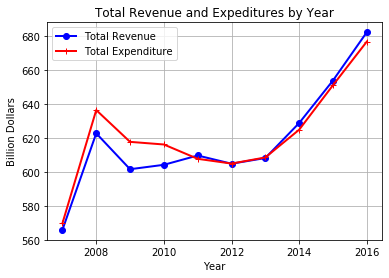

In [34]:
revenue, = plt.plot(x, revenue, marker='o', color='blue', linewidth=2, label='Total Revenue')
expenditure, = plt.plot(x, expenditure, marker='+', color='red', linewidth=2, label='Total Expenditure')
plt.xlabel('Year')
plt.ylabel('Billion Dollars')
plt.title("Total Revenue and Expeditures by Year")
plt.legend(loc='best')
plt.grid()

Text(0, 0.5, 'Revenue in Billion')

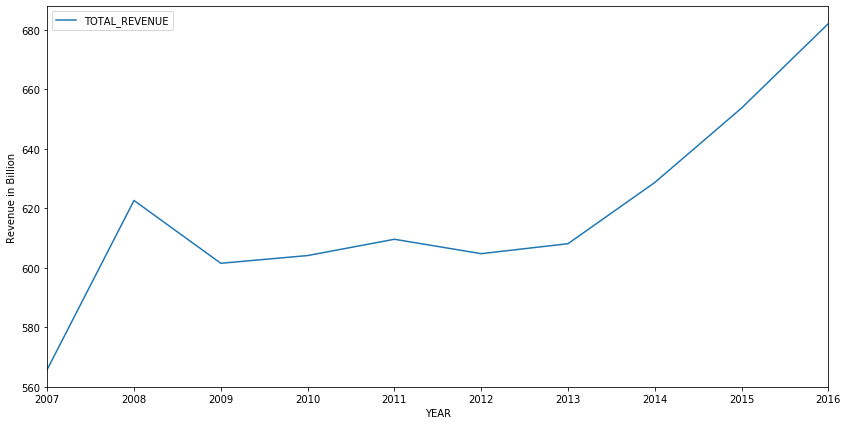

In [35]:
revenue_grouped_df.plot(kind='line', label='Total_Revenue(billion)', figsize=(14,7))
plt.ylabel("Revenue in Billion")

In [36]:
revenue = pd.read_excel(file)
revenue

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2007,7069040,689072,4070949,2309019,7196459,3653466,2174210,546077,687816
1,ALASKA,2007,1800616,282270,1052357,465989,1938755,927307,645857,60699,257723
2,ARIZONA,2007,8724434,953861,4204089,3566484,8709531,3977800,2656438,403069,1436673
3,ARKANSAS,2007,4415981,483689,3319030,613262,4779308,2337748,1378576,450454,470562
4,CALIFORNIA,2007,72516936,7200298,42333637,22983001,73225422,34685013,20655194,3467540,10058842
...,...,...,...,...,...,...,...,...,...,...,...
510,VIRGINIA,2016,16259274,1058146,6297587,8903541,16497520,8944614,5164699,643506,1161323
511,WASHINGTON,2016,14964364,1097684,9211201,4655479,15253296,7087365,4904575,577606,2204059
512,WEST_VIRGINIA,2016,3391579,358068,1863062,1170449,3366566,1804235,1127255,236487,181392
513,WISCONSIN,2016,11697466,782610,5986763,4928093,11787535,5760418,3691439,508013,1082849


In [37]:
revenue_grouped_state = revenue.groupby('STATE')

In [38]:
revenue_grouped_state_df = pd.DataFrame(revenue_grouped_state['TOTAL_REVENUE'].mean()*10)
revenue_grouped_state_df.head()

,TOTAL_REVENUE
STATE,
ALABAMA,73189870.0
ALASKA,23744182.0
ARIZONA,85250780.0
ARKANSAS,50163444.0
CALIFORNIA,737152148.0


In [39]:
exp_grouped_state_df = pd.DataFrame(revenue_grouped_state['TOTAL_EXPENDITURE'].mean()*10)
exp_grouped_state_df.head()

,TOTAL_EXPENDITURE
STATE,
ALABAMA,75426935.0
ALASKA,24892799.0
ARIZONA,84948823.0
ARKANSAS,52260914.0
CALIFORNIA,741797086.0


In [40]:
rev_exp_df = pd.merge(revenue_grouped_state_df, exp_grouped_state_df, on='STATE', how='outer')
rev_exp_df.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
STATE,,
ALABAMA,73189870.0,75426935.0
ALASKA,23744182.0,24892799.0
ARIZONA,85250780.0,84948823.0
ARKANSAS,50163444.0,52260914.0
CALIFORNIA,737152148.0,741797086.0


In [41]:
rev_exp_dif = rev_exp_df

In [42]:
rev_exp_dif['DIFFERENCE'] = rev_exp_df['TOTAL_REVENUE'] - rev_exp_df['TOTAL_EXPENDITURE']
rev_exp_dif.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,DIFFERENCE
STATE,,,
ALABAMA,73189870.0,75426935.0,-2237065.0
ALASKA,23744182.0,24892799.0,-1148617.0
ARIZONA,85250780.0,84948823.0,301957.0
ARKANSAS,50163444.0,52260914.0,-2097470.0
CALIFORNIA,737152148.0,741797086.0,-4644938.0


In [43]:
rev_exp_dif_df = rev_exp_dif.drop(columns=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'], axis=1)
rev_exp_dif_df.head()

,DIFFERENCE
STATE,
ALABAMA,-2237065.0
ALASKA,-1148617.0
ARIZONA,301957.0
ARKANSAS,-2097470.0
CALIFORNIA,-4644938.0


Text(0, 0.5, 'Thousand Dollars')

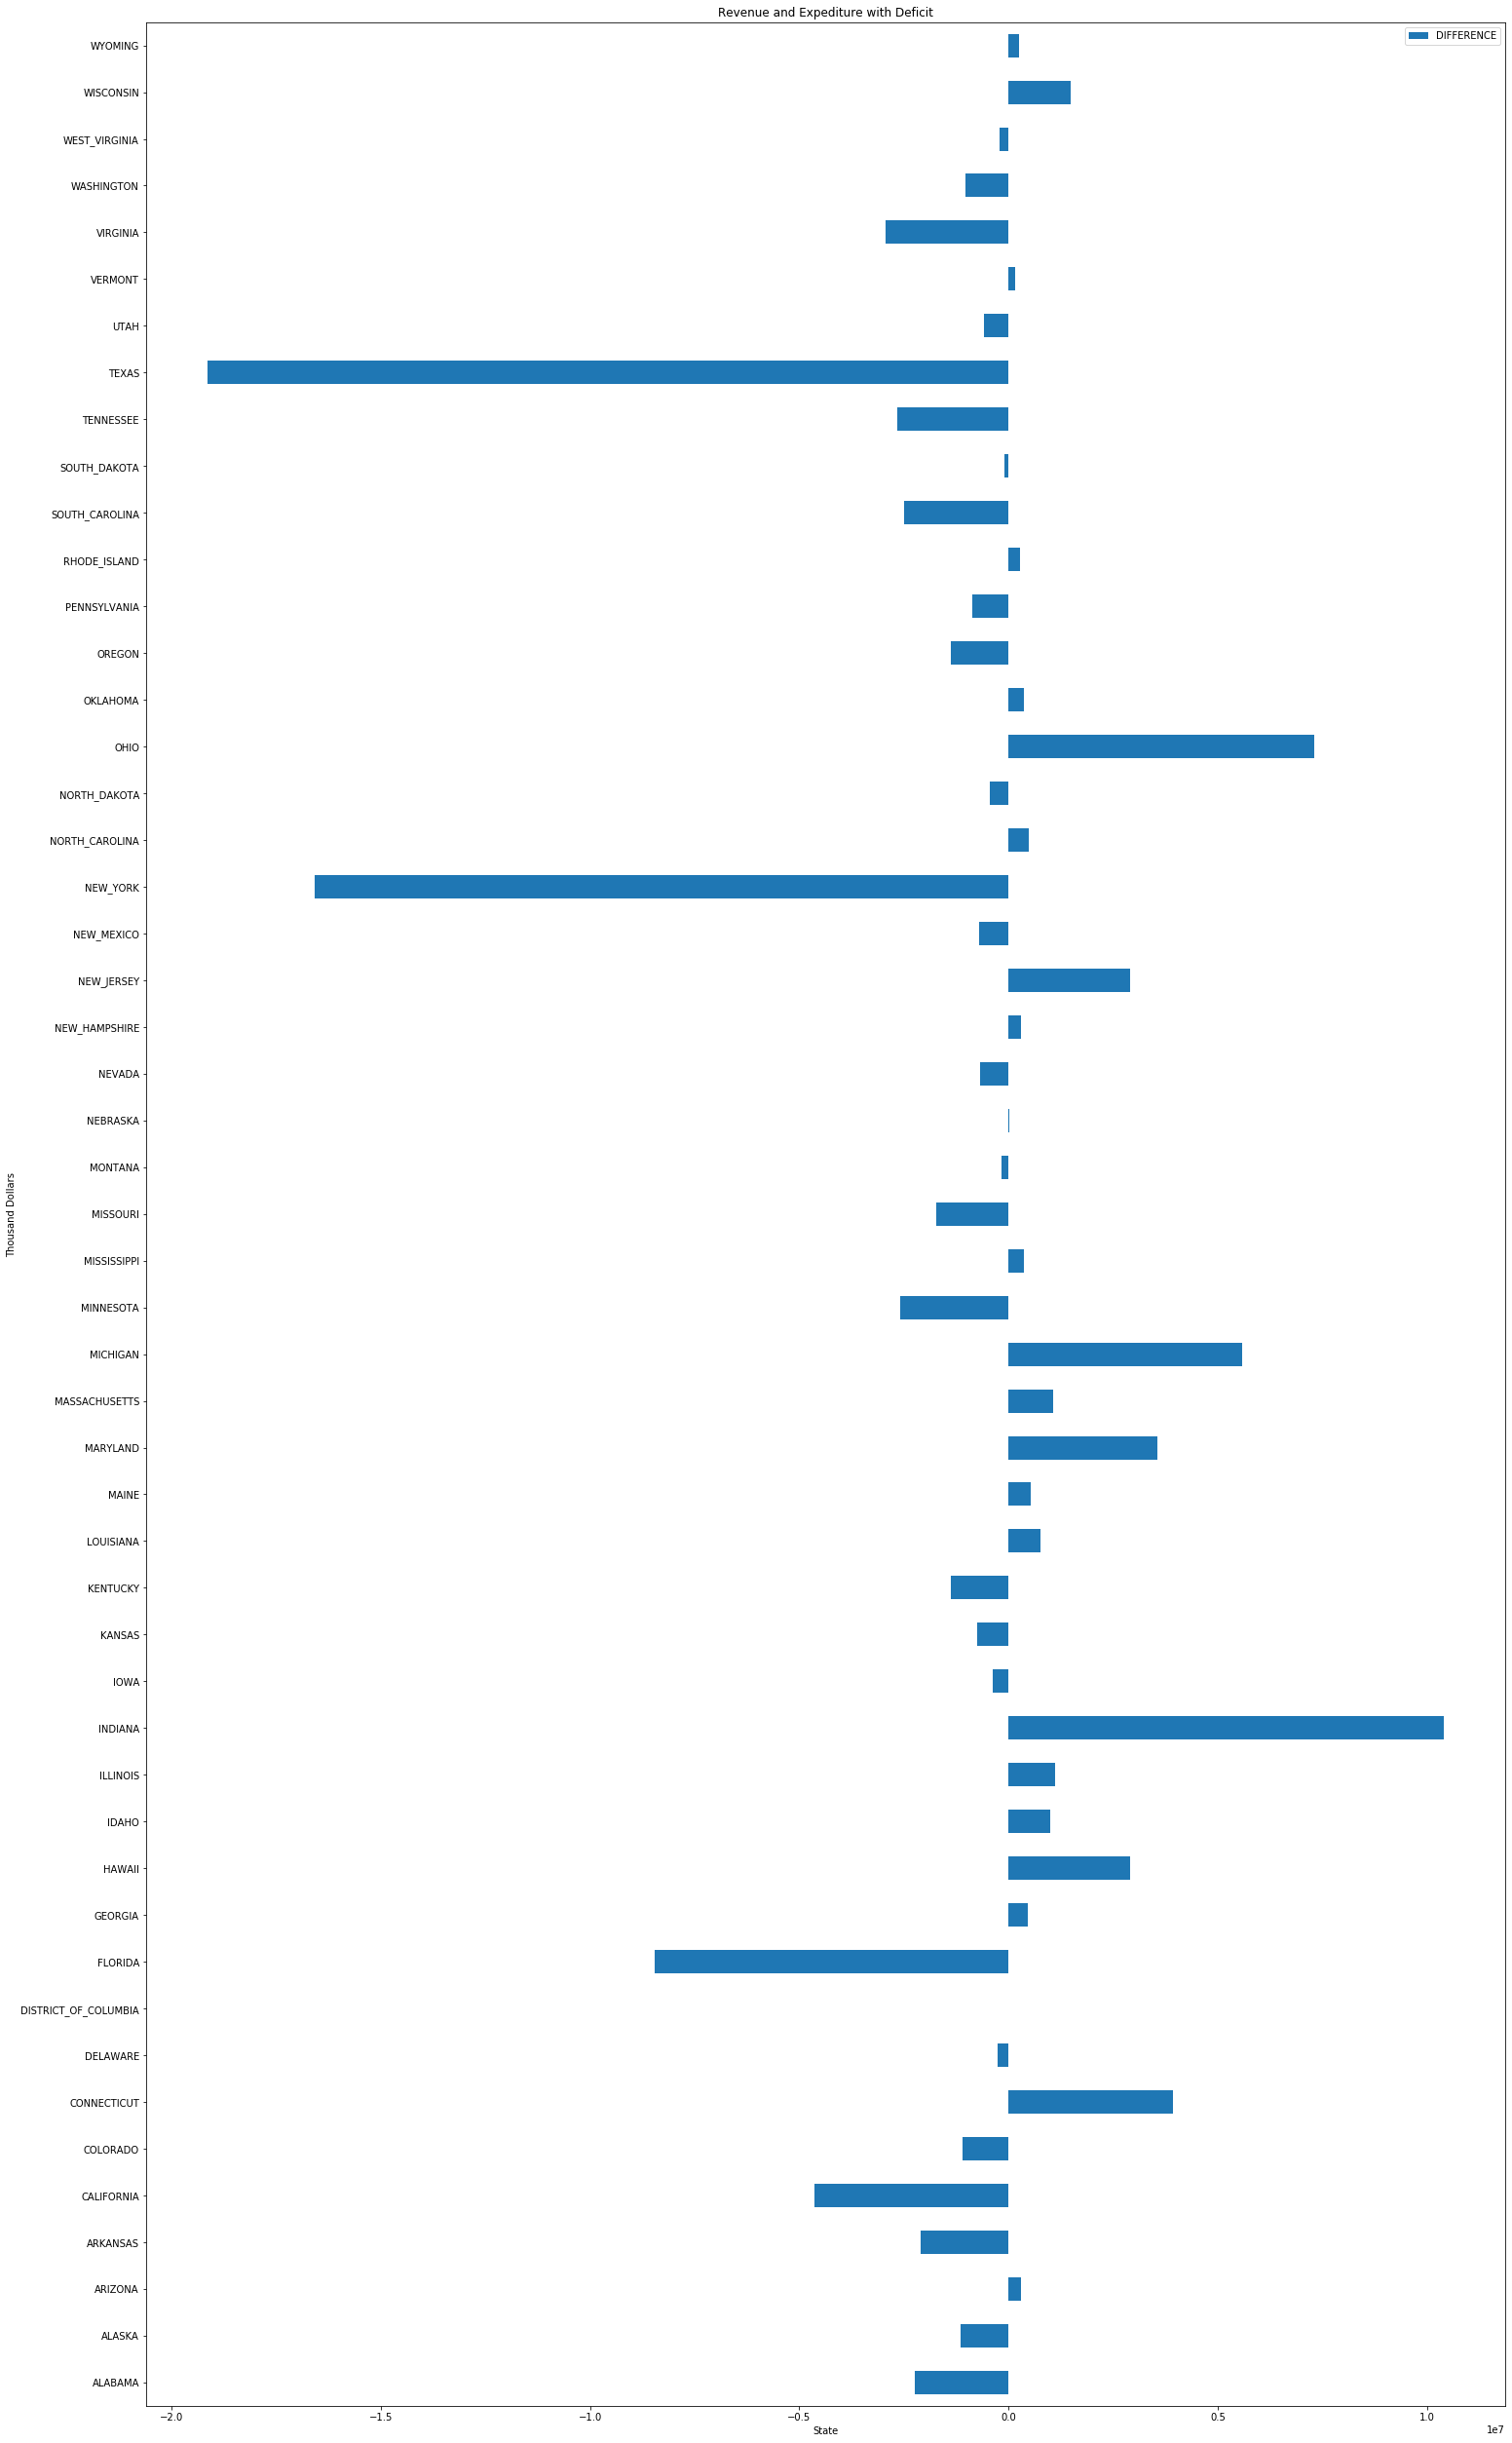

In [44]:
x = rev_exp_dif_df['DIFFERENCE']

# if x < 0:
#     colors = 'red'
# else:
#     colors = 'blue'
        
    
# colors[x>=0] = (0,0,1)
rev_exp_dif_df.plot(kind='barh', figsize=(25,45) )
plt.title("Revenue and Expediture with Deficit")
plt.xlabel('State')
plt.ylabel("Thousand Dollars")

Text(0.5, 1.0, 'Revenue and Expenditure by State')

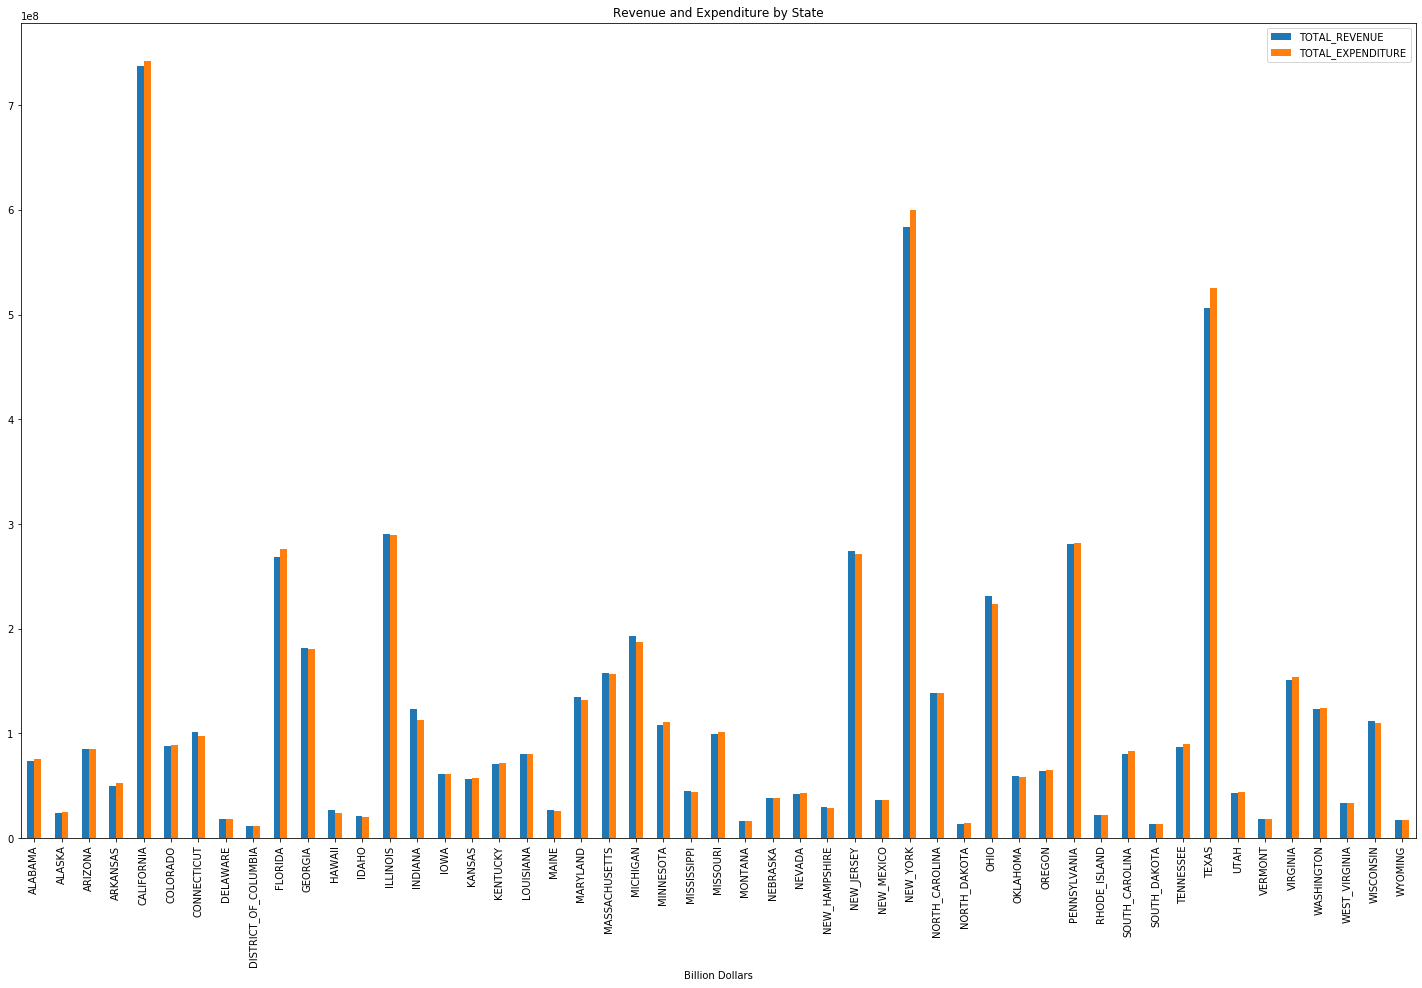

In [45]:
rev_exp_df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].plot(kind='bar', figsize=(25,15))
plt.xlabel('Billion Dollars')
plt.title("Revenue and Expenditure by State")

Text(0.5, 0, 'Revenue in billion')

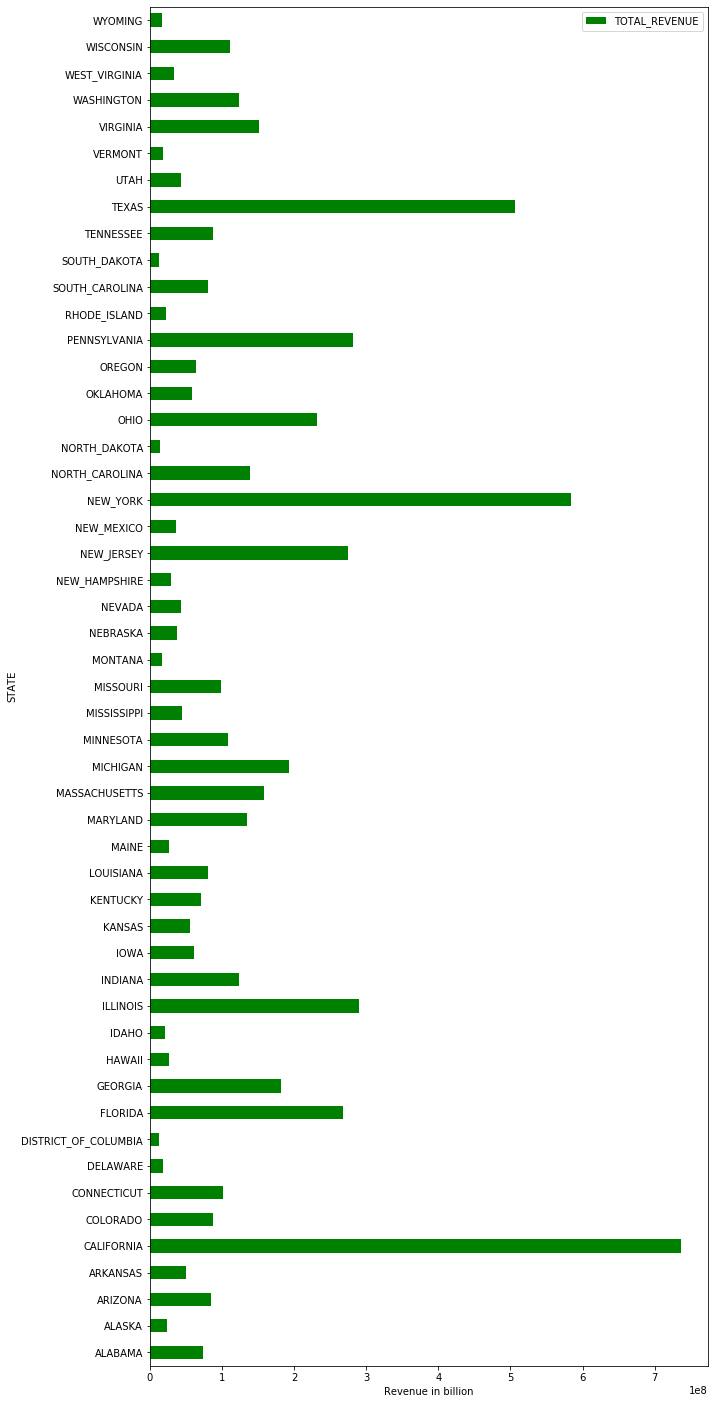

In [46]:
revenue_grouped_state_df.plot(kind='barh', figsize=(10,25), color='green')
plt.xlabel('Revenue in billion')

Text(0.5, 0, 'Expenditures in billion')

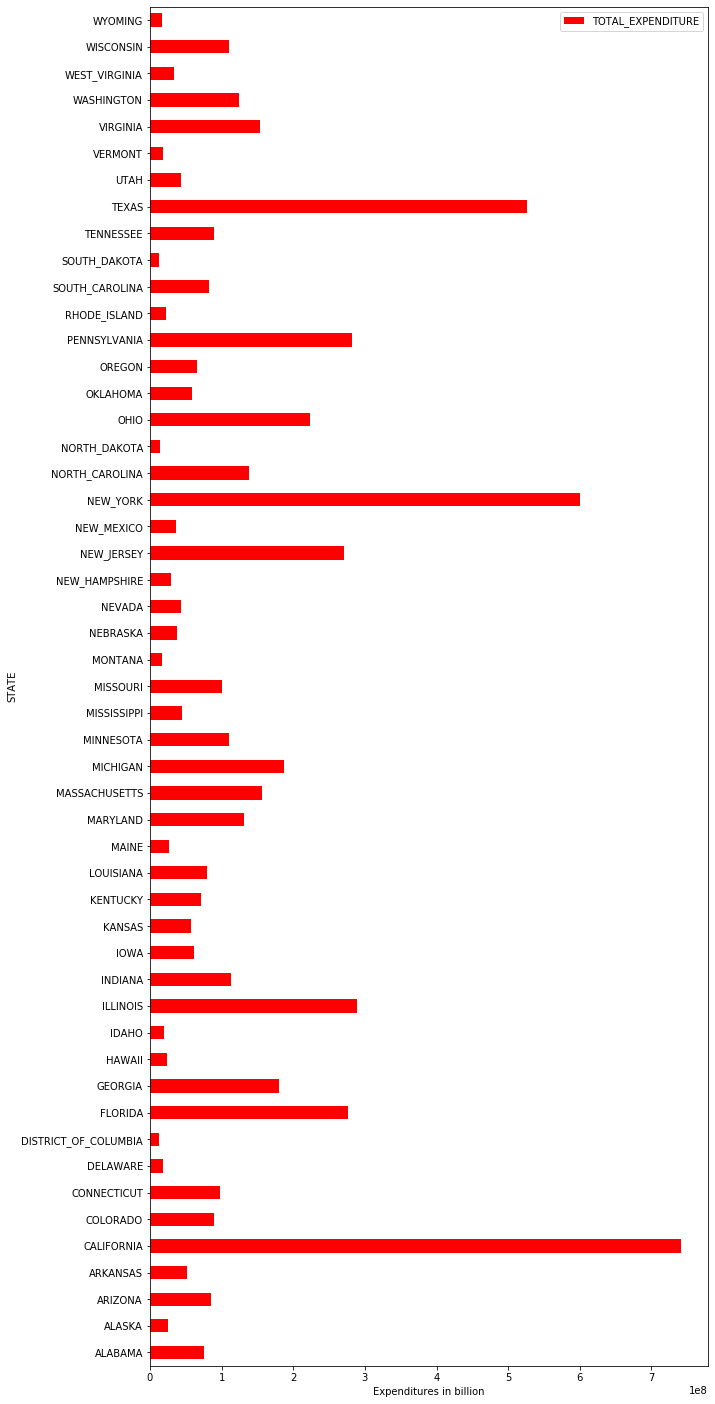

In [47]:
exp_grouped_state_df.plot(kind='barh', figsize=(10,25), color='red')
plt.xlabel('Expenditures in billion')

In [48]:
ga_numbers = revenue.loc[revenue['STATE']=='GEORGIA']
ga_numbers_df = ga_numbers[['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]
ga_numbers_df

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
10,2007,17755989,17389530
62,2008,18683630,19172087
116,2009,17972839,19025136
168,2010,17839851,17834488
219,2011,18030043,17187481
270,2012,17559894,17400209
321,2013,17459504,17317504
372,2014,17821620,17668352
423,2015,18584666,18501103
474,2016,19403453,19158388


In [49]:
ga_numbers_df_1 = ga_numbers_df.set_index('YEAR')
ga_numbers_df_1

,TOTAL_REVENUE,TOTAL_EXPENDITURE
YEAR,,
2007,17755989,17389530
2008,18683630,19172087
2009,17972839,19025136
2010,17839851,17834488
2011,18030043,17187481
2012,17559894,17400209
2013,17459504,17317504
2014,17821620,17668352
2015,18584666,18501103


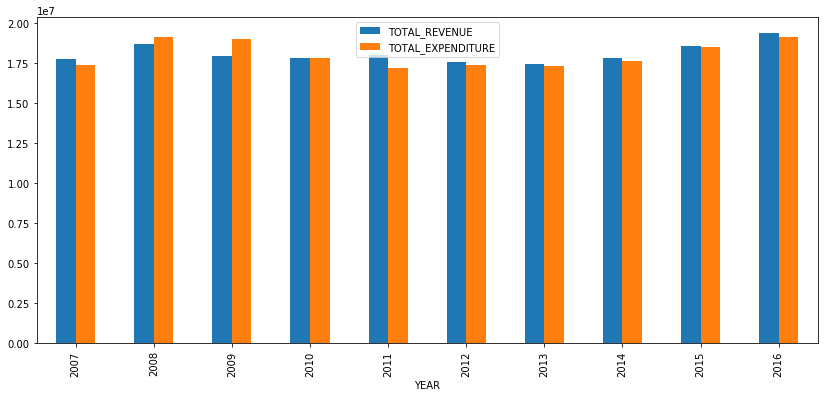

In [50]:
ga_numbers_df_1.plot(kind='bar', figsize=(14,6))

In [51]:
clean_grad_rate = grad_rate_renamed #.astype(str).str.upper()

In [52]:
clean_grad_rate_df = clean_grad_rate
clean_grad_rate_df.head(50)

,State,2010,2011,2012,2013,2014,2015,2016
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0
5,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
6,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0
7,Colorado,74.0,75.0,76.9,75.0,77.3,79.0,79.0
8,Connecticut,83.0,85.0,85.5,85.0,87.2,87.0,88.0
9,Delaware,78.0,80.0,80.4,80.0,85.6,86.0,87.0
10,District of Columbia,59.0,59.0,62.3,59.0,68.5,69.0,73.0
11,Florida,71.0,75.0,75.6,75.0,77.9,81.0,82.0


In [53]:
clean_grad_rate_df['Agg'] = clean_grad_rate.mean(axis=1)


In [54]:
grad_rate_cleaned = clean_grad_rate[['State', 'Agg']].set_index('State')
grad_rate_cleaned.head()

,Agg
State,
Alabama,81.042857
Alaska,72.771429
Arizona,66.928571
Arkansas,84.828571
California,80.342857


In [55]:
pupil_spending_renamed = pupil_spending_df.rename(columns={'STATE':'State'})
pupil_spending_renamed.head()

,State,2007,2007 pct_change,2008,2008 pct_change,2009,2009 pct_change,2010,2010 pct_change,2011,...,2012,2012 pct_change,2013,2013 pct_change,2014,2014 pct_change,2015,2015 pct_change,2016,2016 pct_change
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491
5,ARKANSAS,8283.57,4.5,8541.25,3.1,8711.92,2.0,9143.21,5.0,9353.38,...,9410.62,0.611975,9394.45,-0.171851,9615.73,2.35541,9693.8,0.811872,9845.57,1.56565
6,CALIFORNIA,9152.39,7.9,9863.39,7.8,9657.49,-2.1,9374.71,-2.9,9148.75,...,9182.89,0.373249,9219.51,0.398729,9594.76,4.0702,10466.5,9.08591,11495.4,9.82971


In [56]:
pupil_spending_df_1 = pupil_spending_renamed[['State', 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]].set_index('State')
pupil_spending_df_1.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,
ALABAMA,8390.62,9103.36,8870,8880.74,8812.7,8562.06,8755.23,9027.69,9127.93,9242.68
ALASKA,12300.2,14629.7,15551.8,15782.5,16674,17390.4,18175,18415.9,20172.5,17510
ARIZONA,7196.3,7607.74,7813.27,7848.08,7665.84,7558.92,7207.75,7527.77,7489.5,7613.01
ARKANSAS,8283.57,8541.25,8711.92,9143.21,9353.38,9410.62,9394.45,9615.73,9693.8,9845.57
CALIFORNIA,9152.39,9863.39,9657.49,9374.71,9148.75,9182.89,9219.51,9594.76,10466.5,11495.4


In [57]:
pupil_spending_df_1['Avg'] = pupil_spending_df_1.mean(axis=1)
pupil_spending_df_1.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Avg
State,,,,,,,,,,,
ALABAMA,8390.62,9103.36,8870,8880.74,8812.7,8562.06,8755.23,9027.69,9127.93,9242.68,8877.302345
ALASKA,12300.2,14629.7,15551.8,15782.5,16674,17390.4,18175,18415.9,20172.5,17510,16660.196507
ARIZONA,7196.3,7607.74,7813.27,7848.08,7665.84,7558.92,7207.75,7527.77,7489.5,7613.01,7552.818804
ARKANSAS,8283.57,8541.25,8711.92,9143.21,9353.38,9410.62,9394.45,9615.73,9693.8,9845.57,9199.351832
CALIFORNIA,9152.39,9863.39,9657.49,9374.71,9148.75,9182.89,9219.51,9594.76,10466.5,11495.4,9715.579104


In [58]:
student_spending_df_2 = pupil_spending_df_1[['Avg']]
student_spending_df_2.head(50)
#student_spending_df_2.sort(ascending = "False")

,Avg
State,
ALABAMA,8877.302345
ALASKA,16660.196507
ARIZONA,7552.818804
ARKANSAS,9199.351832
CALIFORNIA,9715.579104
COLORADO,8853.965624
CONNECTICUT,15986.594717
DELAWARE,13187.595100
DISTRICT_OF_COLUMBIA,17712.870782


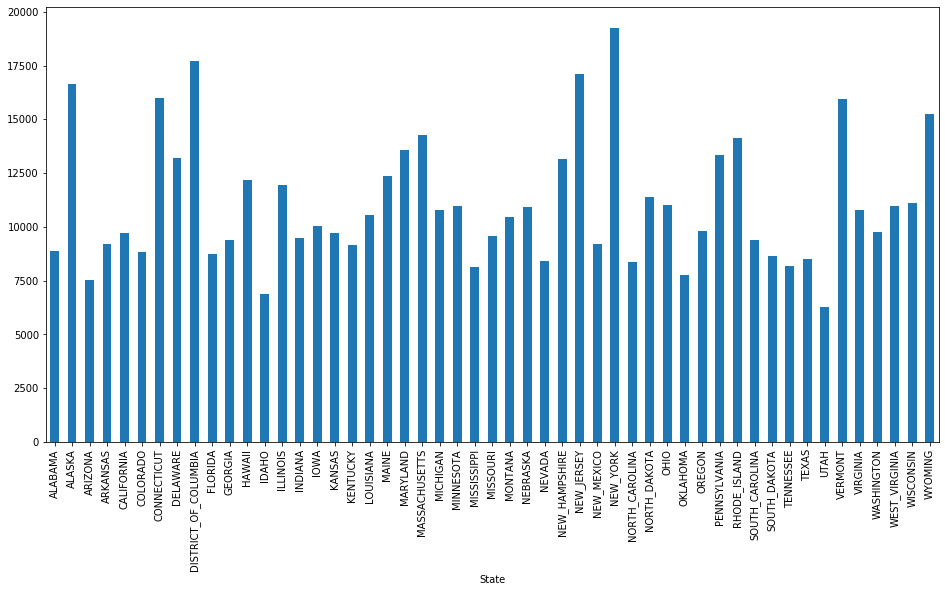

In [59]:
student_spending_df_2['Avg'].plot(kind='bar', figsize=(16,8), label='Per Student Spending')
# x=student_spending_df_2['Avg']
# y=student_spending_df_2['Agg']
# ax2 = plt.twinx()
# ax2.plot(x,y)

In [60]:
student_spending_df_2['Agg'] = grad_rate_cleaned['Agg']
student_spending_df_2.head()

C:\Users\mwilliamson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Avg,Agg
State,,
ALABAMA,8877.302345,NaN
ALASKA,16660.196507,NaN
ARIZONA,7552.818804,NaN
ARKANSAS,9199.351832,NaN
CALIFORNIA,9715.579104,NaN


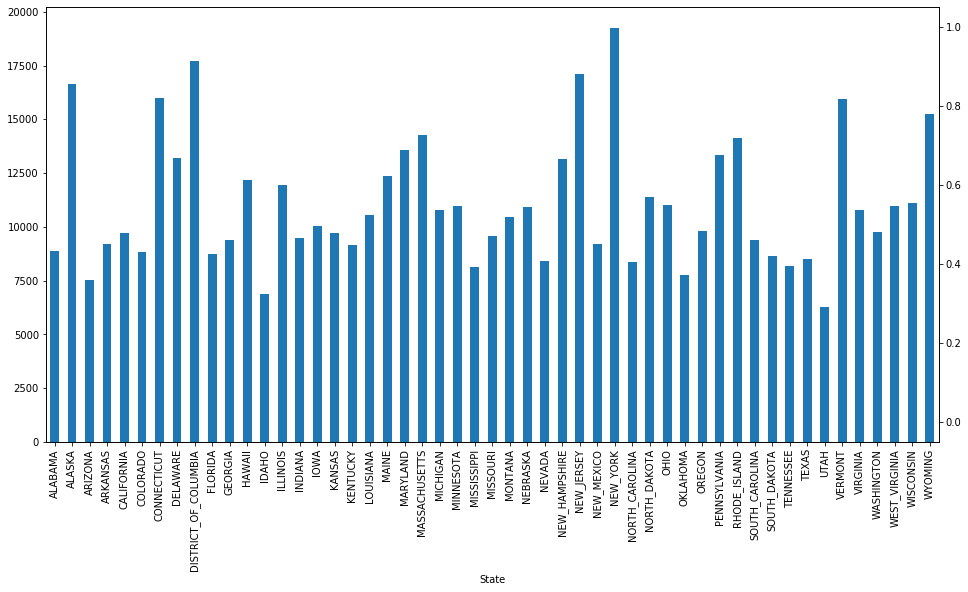

In [61]:
fig = plt.figure()
ax = student_spending_df_2['Avg'].plot(kind='bar', figsize=(16,8), label='Per Student Spending')
ax2 = ax.twinx()
ax2.plot(student_spending_df_2['Agg'].values, linestyle='-', marker='o', linewidth=2.0, color='red')

In [62]:
pupil_spending_us = round(pupil_spending_df_1.mean(),2)
student_spending_us = pd.DataFrame(pupil_spending_us)
student_spending_us_df = student_spending_us.drop(['Avg'])
student_spending_renamed = student_spending_us_df.rename(columns={0:'Avg_spent_per_student in US'})
student_spending_renamed

,Avg_spent_per_student in US
2007,9785.45
2008,10383.91
2009,10752.53
2010,10934.36
2011,11036.74
2012,11094.14
2013,11250.78
2014,11501.45
2015,11876.67
2016,12113.51


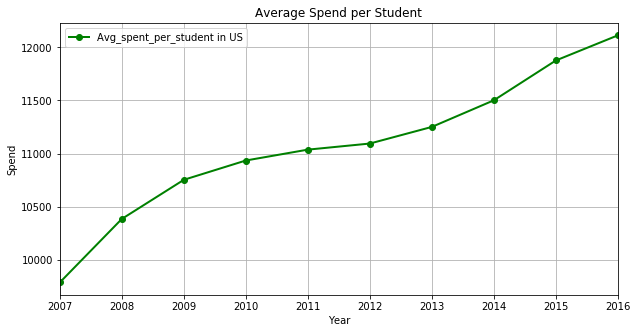

In [63]:
student_spending_renamed.plot(kind='line', marker='o', linestyle='-', linewidth=2, color='g', figsize=(10,5))
plt.title("Average Spend per Student")
plt.xlabel("Year")
plt.ylabel("Spend")
plt.grid()

In [64]:
clean_grad_rate_df.head()

,State,2010,2011,2012,2013,2014,2015,2016,Agg
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,81.042857
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,72.771429
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0,66.928571
5,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0,84.828571
6,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0,80.342857


In [65]:
grad_rate_df_reset = clean_grad_rate_df.set_index('State').drop(['Agg'], axis=1)
grad_rate_df_reset.head()

,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,
Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0
Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
California,76.0,79.0,80.4,79.0,82.0,83.0,83.0


In [66]:
grad_rate_us = round(grad_rate_df_reset.mean(),2)
grad_rate_us_df = pd.DataFrame(grad_rate_us)
grad_rate_us_renamed = grad_rate_us_df.rename(columns={0:'Avg_graduation Rate in US'})
grad_rate_us_renamed

,Avg_graduation Rate in US
2010,78.38
2011,79.75
2012,81.09
2013,79.75
2014,82.99
2015,82.43
2016,84.59


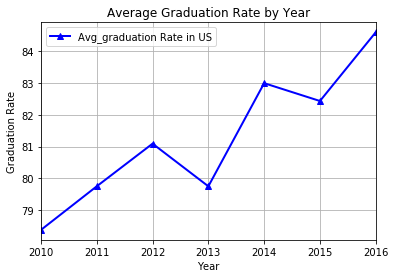

In [67]:
grad_rate_us_renamed.plot(kind='line', marker='^', linestyle='-', color='b', linewidth=2)
plt.title("Average Graduation Rate by Year")
plt.xlabel("Year")
plt.ylabel("Graduation Rate")
plt.grid()

In [68]:
clean_grad_rate_df.head(2)

,State,2010,2011,2012,2013,2014,2015,2016,Agg
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,81.042857
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,72.771429


In [69]:
ga_grad_rate = clean_grad_rate_df.loc[clean_grad_rate_df['State']=='Georgia']
ga_grad_sorted = ga_grad_rate.set_index('State')
ga_grad_sorted_df = ga_grad_sorted.drop(['Agg'], axis=1)
ga_grad_sorted_df

,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,
Georgia,67.0,70.0,71.7,70.0,78.8,79.0,81.0


In [70]:
ga_grad_rate = clean_grad_rate_df.loc[clean_grad_rate_df['State']=='Georgia']
ga_grad_df = ga_grad_rate.drop(['Agg', 'State'], axis=1)
ga_grad_df

,2010,2011,2012,2013,2014,2015,2016
12,67.0,70.0,71.7,70.0,78.8,79.0,81.0


In [71]:
ga_grad_sorted_df_1 = ga_grad_sorted_df.T
ga_grad_sorted_df_1

State,Georgia
2010,67.0
2011,70.0
2012,71.7
2013,70.0
2014,78.8
2015,79.0
2016,81.0


In [72]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
y = [67, 70, 71.7, 70, 78.8, 79, 81]

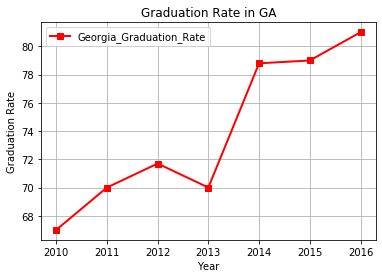

In [73]:
plt.plot(x, y, marker='s', linestyle='-', color = 'red', linewidth = 2, label='Georgia_Graduation_Rate')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("Graduation Rate")
plt.title("Graduation Rate in GA")
plt.grid()

In [74]:
ga_student_spending = pd.DataFrame(pupil_spending_df_1.loc['GEORGIA'])
ga_student_spending_rename = ga_student_spending.rename(columns={'GEORGIA':'Georgia Per Student Spending'})
ga_student_spending_df = ga_student_spending_rename.drop([2007, 2008, 2009, 'Avg'])
ga_student_spending_df

,Georgia Per Student Spending
2010,9394.03
2011,9252.93
2012,9247.02
2013,9098.58
2014,9201.98
2015,9427.28
2016,9768.71


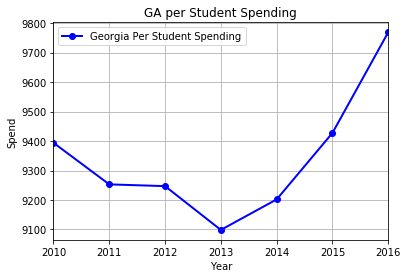

In [75]:
ga_student_spending_df.plot(kind='line', marker='o', linestyle='-', color = 'b', linewidth=2, label='Georgia Average Spending per Student')
plt.legend(loc='best')
plt.title("GA per Student Spending")
plt.xlabel("Year")
plt.ylabel("Spend")
plt.grid()

In [76]:
teacher_salaries_new.head(2)

,State,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568
2,Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682


In [77]:
teacher_salaries_us = round(teacher_salaries.mean(),2)
teacher_salaries_us_df = pd.DataFrame(teacher_salaries_us)
teacher_salaries_us_df.head()

,0
2007,48249.31
2008,50073.60
2009,51449.33
2010,52393.90
2011,52954.04


In [81]:
teacher_salaries_renamed = teacher_salaries_us_df.rename(columns={0:'Average Teacher Salary in US'})
teacher_salaries_renamed.head(11)

,Average Teacher Salary in US
2007,48249.31
2008,50073.60
2009,51449.33
2010,52393.90
2011,52954.04
2012,53167.31
2013,53755.52
2014,54287.50
2015,54926.77
2016,55595.42


<function matplotlib.pyplot.show(*args, **kw)>

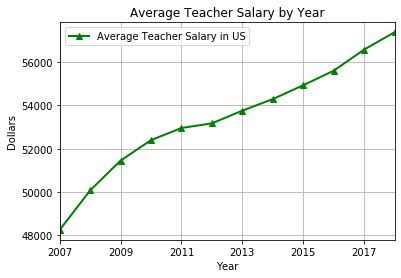

In [82]:
teacher_salaries_renamed.plot(kind='line', marker='^', color='g', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.title('Average Teacher Salary by Year')
# plt.xlim(47000, 58000)
plt.grid()
plt.show

In [83]:
teacher_salaries_sorted = teacher_salaries_new.set_index('State')
teacher_salaries_sorted.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,,
Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568
Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682
Arizona,44700.0,45772.0,46358.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218,47255,48723
Arkansas,45590.0,45238.0,45738.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218,48304,50544
California,63640.0,65808.0,66995.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179,79128,80680


In [84]:
teacher_salaries_sorted['Avg'] = round(teacher_salaries_sorted.mean(axis=1),2)
teacher_salaries_sorted.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Avg
State,,,,,,,,,,,,,
Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568,47917.17
Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682,63326.25
Arizona,44700.0,45772.0,46358.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218,47255,48723,46405.25
Arkansas,45590.0,45238.0,45738.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218,48304,50544,46980.17
California,63640.0,65808.0,66995.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179,79128,80680,71159.08


In [85]:
teacher_salaries_states = teacher_salaries_sorted[['Avg']]
teacher_salaries_states.head()

,Avg
State,
Alabama,47917.17
Alaska,63326.25
Arizona,46405.25
Arkansas,46980.17
California,71159.08


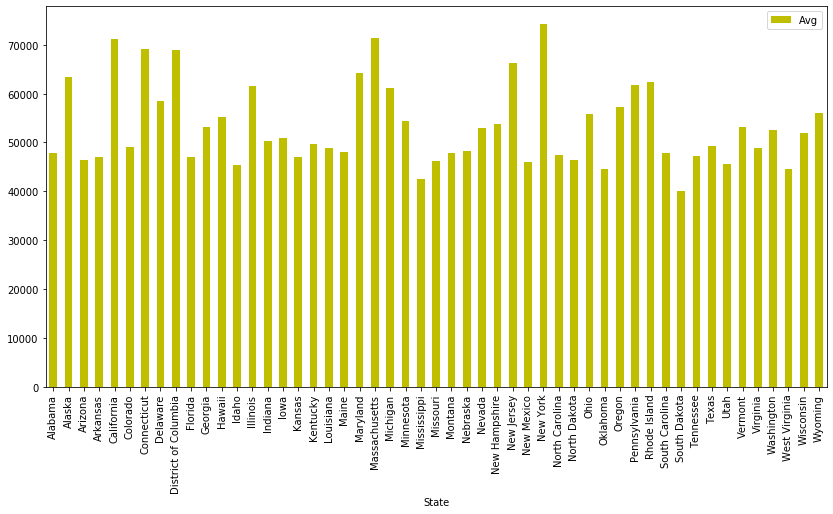

In [86]:
teacher_salaries_states.plot(kind='bar', figsize=(14,7), color='y')

In [87]:
teacher_salaries_ga = teacher_salaries.loc[teacher_salaries['State'] == 'Georgia']
teacher_salaries_ga_clean = teacher_salaries_ga.drop(columns=['2007', '2008', '2009'], axis=1)
teacher_salaries_ga_df = teacher_salaries_ga_clean.set_index('State')
teacher_salaries_ga_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,
Georgia,53112.0,52815.0,52938.0,52880.0,52924,53382,54190,55532,56329


In [88]:
x_ga = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
y_ga = [53112, 52185, 52938, 52880, 52924, 53382, 54190, 55532, 56329]

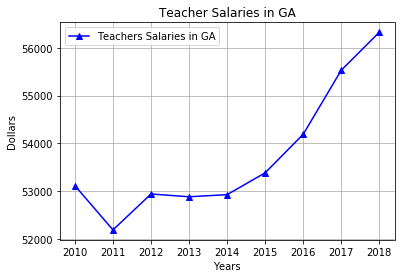

In [89]:
plt.plot(x_ga, y_ga, label='Teachers Salaries in GA', marker='^', linestyle='-', color='b')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Dollars')
plt.title("Teacher Salaries in GA")
plt.grid()
plt.show()

In [90]:
revenue.head()

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2007,7069040,689072,4070949,2309019,7196459,3653466,2174210,546077,687816
1,ALASKA,2007,1800616,282270,1052357,465989,1938755,927307,645857,60699,257723
2,ARIZONA,2007,8724434,953861,4204089,3566484,8709531,3977800,2656438,403069,1436673
3,ARKANSAS,2007,4415981,483689,3319030,613262,4779308,2337748,1378576,450454,470562
4,CALIFORNIA,2007,72516936,7200298,42333637,22983001,73225422,34685013,20655194,3467540,10058842


In [91]:
revenue_fed = revenue[['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']]
revenue_fed.head()

,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
0,689072,4070949,2309019
1,282270,1052357,465989
2,953861,4204089,3566484
3,483689,3319030,613262
4,7200298,42333637,22983001


In [92]:
revenue_avg = pd.DataFrame(revenue_fed.mean())
revenue_avg

,0
FEDERAL_REVENUE,1.113371e+06
STATE_REVENUE,5.458642e+06
LOCAL_REVENUE,5.429237e+06


(-1.1326254441935617,
 1.201897521308351,
 -1.1271160476226083,
 1.1304524682686676)

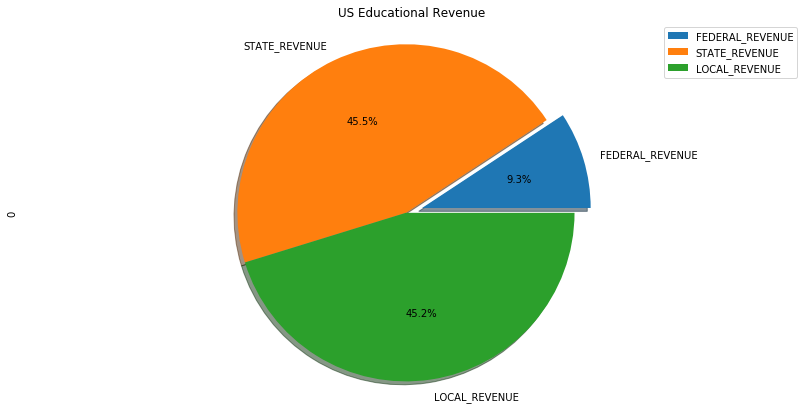

In [93]:
explode=(0.1,0,0)
revenue_avg.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True, subplots=True, figsize=(14,7))
plt.title("US Educational Revenue")
plt.axis('equal')

In [94]:
revenue_ga = revenue[['STATE', 'YEAR', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']]
revenue_ga.head()

,STATE,YEAR,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
0,ALABAMA,2007,689072,4070949,2309019
1,ALASKA,2007,282270,1052357,465989
2,ARIZONA,2007,953861,4204089,3566484
3,ARKANSAS,2007,483689,3319030,613262
4,CALIFORNIA,2007,7200298,42333637,22983001


In [95]:
revenue_ga_df = revenue_ga.loc[revenue_ga['STATE']=='GEORGIA']
rev_ga_df = revenue_ga_df.drop(['YEAR'], axis=1)
rev_ga_avg = rev_ga_df.mean()
rev_ga_df = pd.DataFrame(rev_ga_avg)
rev_ga_df                       

,0
FEDERAL_REVENUE,1854619.4
STATE_REVENUE,7826620.9
LOCAL_REVENUE,8429908.6


(-1.1317568432042893,
 1.2008995872410737,
 -1.1231179788340084,
 1.1277735439600076)

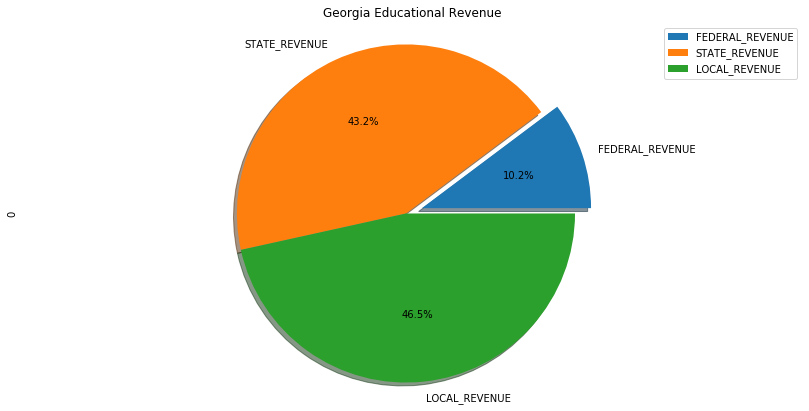

In [96]:
explode = (0.1,0,0)
rev_ga_df.plot(kind='pie', explode=explode, autopct = "%1.1f%%", shadow=True, subplots=True, figsize=(14,7))
plt.title("Georgia Educational Revenue")
plt.axis('equal')

In [97]:
rev_exp_df_1 = revenue[['STATE', 'YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]
rev_exp_df_1.head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,ALABAMA,2007,7069040,7196459
1,ALASKA,2007,1800616,1938755
2,ARIZONA,2007,8724434,8709531
3,ARKANSAS,2007,4415981,4779308
4,CALIFORNIA,2007,72516936,73225422


In [98]:
student_spending_df_2.head()

,Avg,Agg
State,,
ALABAMA,8877.302345,NaN
ALASKA,16660.196507,NaN
ARIZONA,7552.818804,NaN
ARKANSAS,9199.351832,NaN
CALIFORNIA,9715.579104,NaN


In [99]:
grad_rate_cleaned.head()

,Agg
State,
Alabama,81.042857
Alaska,72.771429
Arizona,66.928571
Arkansas,84.828571
California,80.342857


y = 0.0x + 80.51
0.038980304198073815


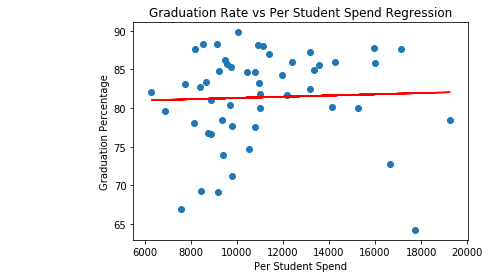

In [100]:
#x_grad = grad_rate_cleaned['Agg']
#y_spend = student_spending_df_2['Avg']
import seaborn as sns
x_spend = student_spending_df_2['Avg']
y_grad = grad_rate_cleaned['Agg']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_spend,y_grad)
regress_values = x_spend * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_spend,regress_values,"r-")
plt.annotate(line_eq, (20,60), fontsize=15,color="red")
plt.title("Graduation Rate vs Per Student Spend Regression")
plt.xlabel("Per Student Spend")
plt.ylabel("Graduation Percentage")
plt.scatter(x_spend,y_grad)
print(line_eq)
print(rvalue)
plt.show()



In [101]:
ga_student_spending_df.head()

,Georgia Per Student Spending
2010,9394.03
2011,9252.93
2012,9247.02
2013,9098.58
2014,9201.98


In [102]:
x_grad = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
y_grad = [67, 70, 71.7, 70, 78.8, 79, 81]

In [103]:
x_salary = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
y_salary = [53112, 52185, 52938, 52880, 52924, 53382, 54190, 55532, 56329]

In [104]:
teacher_salaries_ga_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,
Georgia,53112.0,52815.0,52938.0,52880.0,52924,53382,54190,55532,56329


In [105]:
teacher_salaries_ga_df_1 = teacher_salaries_ga_df.T
teacher_salaries_ga_df_1

State,Georgia
2010,53112.0
2011,52815.0
2012,52938.0
2013,52880.0
2014,52924.0
2015,53382.0
2016,54190.0
2017,55532.0
2018,56329.0


In [106]:
x_grad

[2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [107]:
teacher_salaries_ga_df_1 = teacher_salaries_ga_df.T
teacher_salaries_ga_df_2 = teacher_salaries_ga_df_1.drop(['2017', '2018'])
teacher_salaries_ga_df_2

State,Georgia
2010,53112.0
2011,52815.0
2012,52938.0
2013,52880.0
2014,52924.0
2015,53382.0
2016,54190.0


In [108]:
ga_grad_sorted_df_1['Teacher Salary'] = teacher_salaries_ga_df_2['Georgia']
ga_grad_sorted_df_1

State,Georgia,Teacher Salary
2010,67.0,53112.0
2011,70.0,52815.0
2012,71.7,52938.0
2013,70.0,52880.0
2014,78.8,52924.0
2015,79.0,53382.0
2016,81.0,54190.0


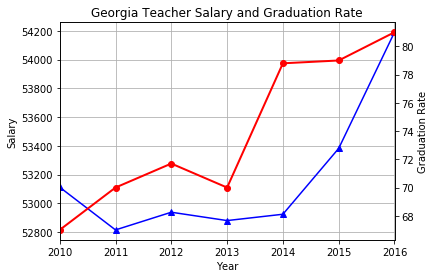

In [109]:
fig = plt.figure()
ax = ga_grad_sorted_df_1['Teacher Salary'].plot(kind='line', marker='^', linestyle='-', color='b', label='Teacher Salary')
ax2 = ax.twinx()
ax.set_title('Georgia Teacher Salary and Graduation Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax2.set_ylabel('Graduation Rate')
ax.grid()
ax2.plot(ga_grad_sorted_df_1['Georgia'].values, linestyle='-', marker='o', linewidth=2.0, color='red')


In [110]:
rev_exp_df_1.head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,ALABAMA,2007,7069040,7196459
1,ALASKA,2007,1800616,1938755
2,ARIZONA,2007,8724434,8709531
3,ARKANSAS,2007,4415981,4779308
4,CALIFORNIA,2007,72516936,73225422


In [111]:
ga_rev = rev_exp_df_1.loc[rev_exp_df_1['STATE'] == 'GEORGIA']
ga_rev

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
10,GEORGIA,2007,17755989,17389530
62,GEORGIA,2008,18683630,19172087
116,GEORGIA,2009,17972839,19025136
168,GEORGIA,2010,17839851,17834488
219,GEORGIA,2011,18030043,17187481
270,GEORGIA,2012,17559894,17400209
321,GEORGIA,2013,17459504,17317504
372,GEORGIA,2014,17821620,17668352
423,GEORGIA,2015,18584666,18501103
474,GEORGIA,2016,19403453,19158388


In [112]:
ga_rev_df = ga_rev.set_index('YEAR')
ga_rev_df
ga_rev_df_1 = ga_rev_df.drop([2007, 2008, 2009], axis=0)
ga_rev_df_1

,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE
YEAR,,,
2010,GEORGIA,17839851,17834488
2011,GEORGIA,18030043,17187481
2012,GEORGIA,17559894,17400209
2013,GEORGIA,17459504,17317504
2014,GEORGIA,17821620,17668352
2015,GEORGIA,18584666,18501103
2016,GEORGIA,19403453,19158388


In [113]:
ga_grad_sorted_df_1['Spending'] = teacher_salaries_ga_df_2['Georgia']
ga_grad_df_5 = ga_grad_sorted_df_1.drop(['Spending'],axis=1)
ga_grad_df_5

State,Georgia,Teacher Salary
2010,67.0,53112.0
2011,70.0,52815.0
2012,71.7,52938.0
2013,70.0,52880.0
2014,78.8,52924.0
2015,79.0,53382.0
2016,81.0,54190.0


In [114]:
ga_rev_df_1['Grad Rate'] = [67, 70, 71.7, 70, 78.8, 79, 81]
ga_rev_df_1

,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,Grad Rate
YEAR,,,,
2010,GEORGIA,17839851,17834488,67.0
2011,GEORGIA,18030043,17187481,70.0
2012,GEORGIA,17559894,17400209,71.7
2013,GEORGIA,17459504,17317504,70.0
2014,GEORGIA,17821620,17668352,78.8
2015,GEORGIA,18584666,18501103,79.0
2016,GEORGIA,19403453,19158388,81.0


In [115]:
ga_rev_df_2 = ga_rev_df_1.drop(['STATE', 'TOTAL_EXPENDITURE'], axis=1)
ga_rev_df_2

,TOTAL_REVENUE,Grad Rate
YEAR,,
2010,17839851,67.0
2011,18030043,70.0
2012,17559894,71.7
2013,17459504,70.0
2014,17821620,78.8
2015,18584666,79.0
2016,19403453,81.0


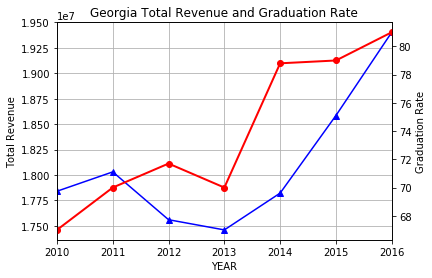

In [116]:
fig = plt.figure()
ax = ga_rev_df_2['TOTAL_REVENUE'].plot(kind='line', marker='^', linestyle='-', color='b', label='Total Revenue')
ax2 = ax.twinx()
ax.grid()
ax2.set_title("Georgia Total Revenue and Graduation Rate")
ax2.set_xlabel("Year")
ax2.set_ylabel("Graduation Rate")
ax.set_ylabel("Total Revenue")
ax2.plot(ga_rev_df_2['Grad Rate'], linestyle='-', marker='o', linewidth=2.0, color='red')

In [117]:
ratio_cleaned_df.head()

,State,2011_staff,2011_enrollment,2011_ratio,2012_staff,2012_enrollment,2012_ratio,2013_staff,2013_enrollment,2013_ratio,2014_staff,2014_enrollment,2014_ratio,2015_staff,2015_enrollment,2015_ratio,2016_staff,2016_enrollment,2016_ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103
5,CALIFORNIA,268689,6287834,23.4019,266255,6299451,23.6595,259506,6312623,24.3256,267685,6312161,23.5806,263475,6305347,23.9315,271287,6309138,23.2563


In [118]:
ga_rev_df_3 = ga_rev_df_1.drop(['STATE', 'TOTAL_REVENUE'], axis=1)
ga_rev_df_3

,TOTAL_EXPENDITURE,Grad Rate
YEAR,,
2010,17834488,67.0
2011,17187481,70.0
2012,17400209,71.7
2013,17317504,70.0
2014,17668352,78.8
2015,18501103,79.0
2016,19158388,81.0


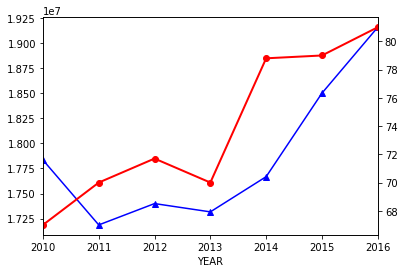

In [119]:
fig = plt.figure()
ax = ga_rev_df_3['TOTAL_EXPENDITURE'].plot(kind='line', marker='^', linestyle='-', color='b', label='Total Expenditure')
ax2 = ax.twinx()
ax2.plot(ga_rev_df_3['Grad Rate'], linestyle='-', marker='o', linewidth=2.0, color='red')

In [120]:
ga_student_spending_df

,Georgia Per Student Spending
2010,9394.03
2011,9252.93
2012,9247.02
2013,9098.58
2014,9201.98
2015,9427.28
2016,9768.71


In [121]:
ga_student_spending_df['Grad Rate'] = [67,70,71.7, 70, 78.8, 79,81]
ga_student_spending_df

,Georgia Per Student Spending,Grad Rate
2010,9394.03,67.0
2011,9252.93,70.0
2012,9247.02,71.7
2013,9098.58,70.0
2014,9201.98,78.8
2015,9427.28,79.0
2016,9768.71,81.0


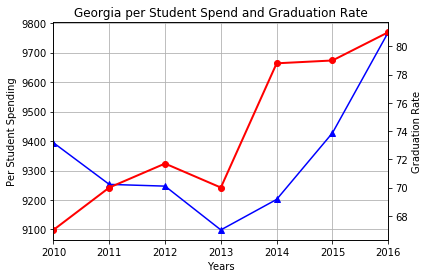

In [122]:
fig = plt.figure()
ax = ga_student_spending_df['Georgia Per Student Spending'].plot(kind='line', marker='^', linestyle='-', color='b', label='Total Expenditure')
ax2 = ax.twinx()
ax.set_title("Georgia per Student Spend and Graduation Rate")
ax.grid()
ax.set_ylabel("Per Student Spending")
ax.set_xlabel("Years")
ax2.set_ylabel("Graduation Rate")
ax2.plot(ga_student_spending_df['Grad Rate'], linestyle='-', marker='o', linewidth=2.0, color='red')

In [123]:
ratio_new = ratio_cleaned_df[['State', '2011_ratio', '2012_ratio', '2013_ratio', '2014_ratio', '2015_ratio', '2016_ratio']]
ratio_new.head()


,State,2011_ratio,2012_ratio,2013_ratio,2014_ratio,2015_ratio,2016_ratio
1,ALABAMA,15.6031,14.3538,15.8222,17.4127,18.2452,17.5142
2,ALASKA,16.2177,17.1161,16.5788,16.9061,16.9145,16.9634
3,ARIZONA,21.2661,22.2931,22.7972,23.1004,23.1322,23.2919
4,ARKANSAS,14.2164,14.2437,14.0262,13.856,13.7452,13.8103
5,CALIFORNIA,23.4019,23.6595,24.3256,23.5806,23.9315,23.2563


In [124]:
ratio_renamed = ratio_new.rename(columns={'2011_ratio': '2011', '2012_ratio': '2012', '2013_ratio': '2013',
                                         '2014_ratio': '2014', '2015_ratio': '2015', '2016_ratio': '2016'})
ratio_renamed.head()
ratio_renamed_set = ratio_renamed.set_index('State')
ratio_renamed_set.head()

,2011,2012,2013,2014,2015,2016
State,,,,,,
ALABAMA,15.6031,14.3538,15.8222,17.4127,18.2452,17.5142
ALASKA,16.2177,17.1161,16.5788,16.9061,16.9145,16.9634
ARIZONA,21.2661,22.2931,22.7972,23.1004,23.1322,23.2919
ARKANSAS,14.2164,14.2437,14.0262,13.856,13.7452,13.8103
CALIFORNIA,23.4019,23.6595,24.3256,23.5806,23.9315,23.2563


In [125]:
ratio_avg = ratio_renamed_set.mean()
ratio_avg_df = pd.DataFrame(ratio_avg)
ratio_avg_df_1 = ratio_avg_df.rename(columns={0:'Ratio'})
ratio_avg_df_1

,Ratio
2011,15.368531
2012,15.500294
2013,15.529901
2014,15.537920
2015,15.444138
2016,15.460810


(13, 16)

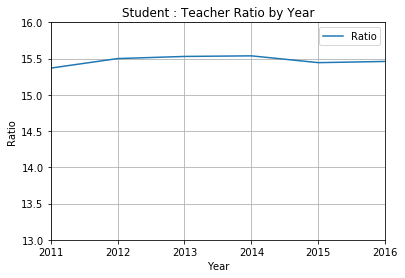

In [126]:
ratio_avg_df_1.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title("Student : Teacher Ratio by Year")
plt.grid()
plt.ylim(13,16)
#plt.xlim(2010, 2016)

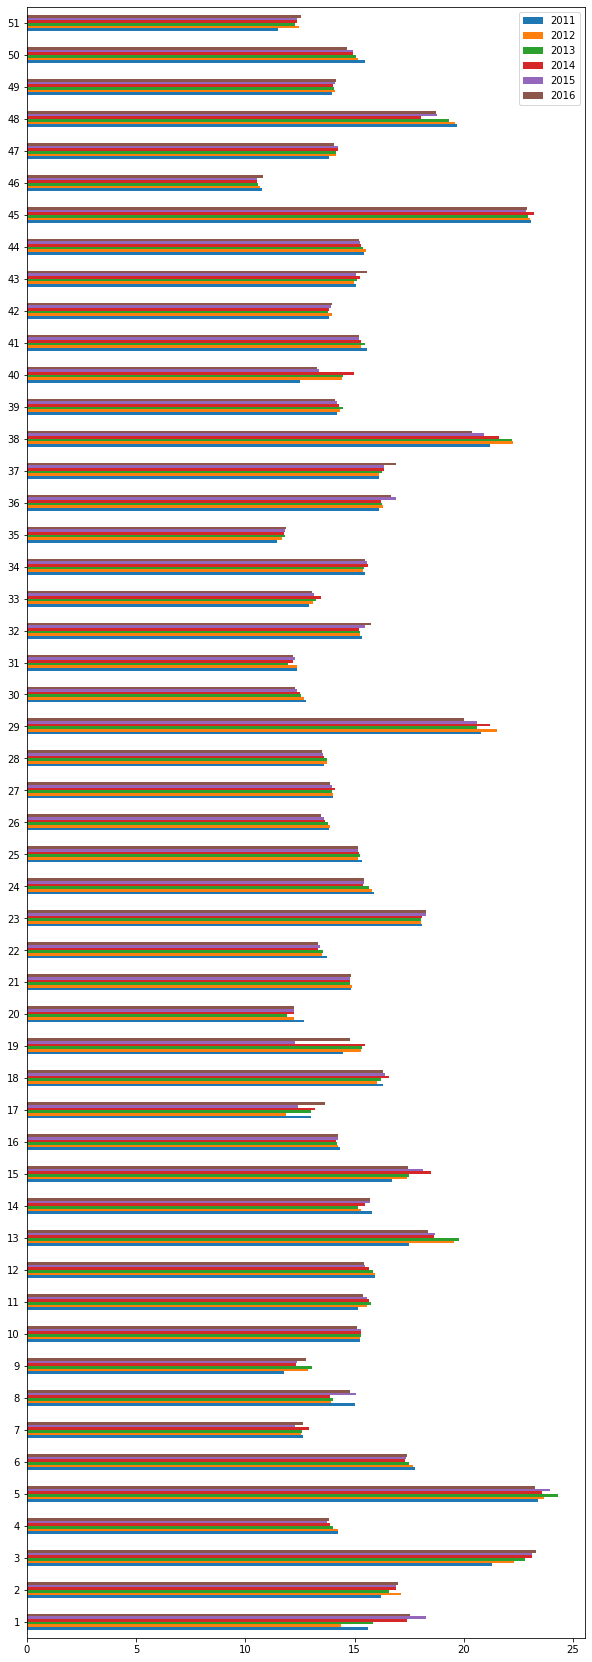

In [127]:
ratio_renamed.plot(kind='barh', figsize=(10,30))